In [1]:
from sys import stderr
def debug(var, name="hoge"):
    print(name +":" + str(type(var)) + " = " + repr(var), file=stderr)
    return

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 目次
- 線型変換plot
- ゼロ空間plot
- 固有値(射影)plot
- MP逆、同時対角化

# 線型変換を可視化する(2x2行列だけ)
- 正方形をAで移す

In [6]:
'''
行列の定義(2x2のみ)
'''


# nom-regular
A = np.array([
    [1,-5], 
    [2,-10]])

# regular
# A = np.array([
#     [2,5],
#     [2,2]])

# rotation
# theta = np.pi/4
# A = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
A

array([[  1,  -5],
       [  2, -10]])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


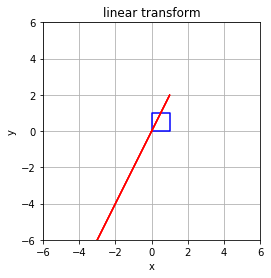

In [9]:
# AX = y で正方形を移す

# 辺の大きさ１の正方形(最後の[0,0]はpyplotの都合)
X = np.array([
    [0,0], 
    [0,1], 
    [1,1], 
    [1,0], 
    [0,0]])

Y = np.array([A@x for x in X])

plt.plot([x[0] for x in X ], [x[1] for x in X ], 'b')
plt.plot([y[0] for y in Y ], [y[1] for y in Y ], 'r')


plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.title(r'linear transform')
plt.axes().set_aspect("equal")
plt.grid(True)
plt.show()

# Aのゼロ空間(kernel)の可視化
- 5*5の正方形(内部も)を移してその範囲のkernelをplotする
- Aの転置の像とAのkernelが直交するチェック

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


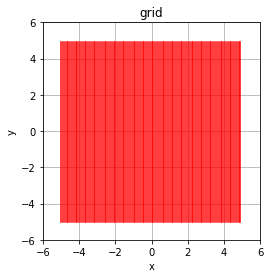

In [15]:
# Aのゼロ空間(kernel)を可視化するために5*5の正方形内の点を作る
x0,x1 = np.meshgrid(np.arange(-5, 5, 000.1),np.arange(-5, 5, 000.1))
plt.plot(x0, x1, 'r')
plt.xlabel('x')
plt.ylabel('y')
X = np.array([np.array([aa,bb],ndmin=2) for a,b in zip(x0, x1) for aa, bb in zip(a,b)])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.title(r'grid')
plt.grid(True)
plt.axes().set_aspect("equal")
plt.show()

In [16]:
# kernel space calc()
kerAx = []
kerAy = []
EPS = 10e-10
for p in X:
    tmp = A@np.transpose(p)
    if abs(tmp[0][0]) < EPS and abs(tmp[1][0]) < EPS:
        kerAx.append(p[0][0])
        kerAy.append(p[0][1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


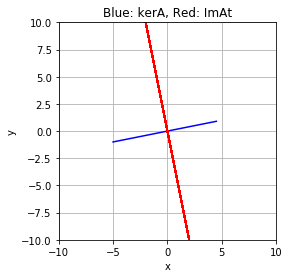

In [17]:
# ker(A) is orthogonal to image(A.T)
plt.plot(kerAx, kerAy, 'b')
Y = np.array([A.T@np.transpose(x) for x in X])
plt.plot([y[0][0] for y in Y ], [y[1][0] for y in Y ], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r'Blue: kerA, Red: ImAt')
plt.grid(True)
plt.axes().set_aspect("equal")
plt.show()

# 固有ベクトルで遊ぶ
- 固有ベクトルがちゃんと定数倍されてるのを確認する(rのプロットがbで見えない(?))でもこれ対称行列以外のケースうまくいかない
- その固有ベクトルに適当な点ベクトルを射影する

In [48]:
'''
行列の定義(2x2のみ)
'''


# nom-regular
# A = np.array([
#     [1,-5], 
#     [2,-10]])

# regular
A = np.array([
    [2,4],
    [4,2]])

# rotation
# theta = np.pi/4
# A = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
A

array([[2, 4],
       [4, 2]])

In [49]:
L,P = np.linalg.eig(A)
v0 = P[:,0]
v1 = P[:,1]
L

array([ 6., -2.])

In [50]:
# Aが対称なら固有ベクトルは直交する
np.dot(v0,v1)

0.0

In [51]:
np.linalg.norm(v0),np.linalg.norm(v1)

(0.9999999999999999, 0.9999999999999999)

6.0
2.0


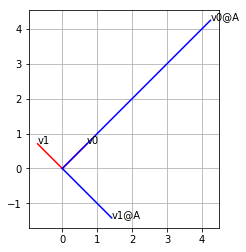

In [61]:
# eigen vector　
ax = plt.axes()
ax.set_aspect('equal')
plt.grid(True)

plt.plot([0,v0[0]],[0,v0[1]],"r")
ax.annotate("v0",(v0[0],v0[1]))

plt.plot([0,v1[0]],[0,v1[1]],"r")
ax.annotate("v1",(v1[0],v1[1]))

plt.plot([0,(v0@A)[0]],[0,(v0@A)[1]],"b")
ax.annotate("v0@A",((v0@A)[0],(v0@A)[1]))

plt.plot([0,(v1@A)[0]],[0,(v1@A)[1]],"b")
ax.annotate("v1@A",((v1@A)[0],(v1@A)[1]))

# 大きさの確認
print(np.linalg.norm(v0@A)/np.linalg.norm(v0))
print(np.linalg.norm(v1@A)/np.linalg.norm(v1))


[ 6. -6.]


Text(5.999999999999999, -5.999999999999999, 'x projection to v1')

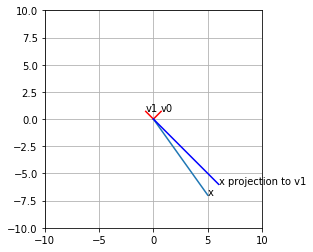

In [58]:
# てきとうなベクトルを上のv2に射影する
x = np.array([5,-7])
# settings
ax = plt.axes()
ax.set_aspect('equal')
plt.grid(True)
plt.xlim(-10,10)
plt.ylim(-10,10)

# plotting basis, target vector
plt.plot([0,v0[0]],[0,v0[1]],"r")
ax.annotate("v0",(v0[0],v0[1]))

plt.plot([0,v1[0]],[0,v1[1]],"r")
ax.annotate("v1",(v1[0],v1[1]))
plt.plot([0,x[0]],[0,x[1]])
ax.annotate("x",(x[0],x[1]))

# projection
# calculate inner product of basis and target
projv1 = (x.T@v1)*v1
print(projv1)
plt.plot([0,projv1[0]],[0,projv1[1]], "b")
ax.annotate("x projection to v1",(projv1[0],projv1[1]))

In [70]:
# vector representation of eigen vector basis P-1@x
eigenrepr = np.linalg.inv(P)@x
print(eigenrepr[0]*P[:,0] + eigenrepr[1]*P[:,1])
print(x)

[ -6. -17.]
[ -6 -17]


# [一般逆](https://ja.wikipedia.org/wiki/%E6%93%AC%E4%BC%BC%E9%80%86%E8%A1%8C%E5%88%97)と同時対角化
- MP逆の計算(numpyだけですはい)
- 同時対角化の計算
    - P_inv@A@Pが単位行列になるPを求める(対角化して、対角行列の-0.5乗を計算するなどして)

In [19]:
# General inverse matrix
A = np.array([
    [3,1],
    [15,5]])
np.linalg.pinv(A)

array([[0.01153846, 0.05769231],
       [0.00384615, 0.01923077]])

In [20]:
A = np.array([
    [2,1],
    [1,2]])
B = np.array([
    [4+np.sqrt(3),2],
    [2,4-np.sqrt(3)]])
# A = np.array([
#     [2.5,1.5],
#     [1.5,2.5]])
# B = np.array([
#     [37/4,15/4],
#     [15/4,13/4]])
# numpy eig returns normalized value
L, P_inv = np.linalg.eig(A)
P_inv

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [21]:
L_sq = np.array([
    [1/np.sqrt(L[1]),0],
    [0,1/np.sqrt(L[0])]])
T = L_sq@P_inv

# check TはAを単位行列にする
print(T@A@T.T)

# T@B@T.Tを対角化するPを求める
targ = T@B@T.T

L, P_inv = np.linalg.eig(targ)

# check P_invはtargを単位行列にする
print(P_inv@targ@P_inv.T)

G = P_inv@T

[[ 1.00000000e+00  8.25542809e-18]
 [-7.75139526e-18  1.00000000e+00]]
[[3.00000000e+00 3.21675714e-16]
 [6.46463071e-16 1.00000000e+00]]


In [22]:
# 対角化チェック
G@A@G.T

array([[1.00000000e+00, 1.52438829e-16],
       [1.02372001e-16, 1.00000000e+00]])

In [23]:
G@B@G.T

array([[3.00000000e+00, 4.57316487e-16],
       [4.90950060e-16, 1.00000000e+00]])

# エルミート行列のチェック
- 随伴チェック(定義なので)
- 固有値が実数
- 固有値ベクトルが全部直交(対称だからそう)

In [66]:
import numpy as np
H = np.array([[2, 4+1j],[4-1j, 1]])

In [67]:
H == H.T.conjugate()

array([[ True,  True],
       [ True,  True]])

In [68]:
# Hermite matrix has real eigen value
L, P = np.linalg.eig(H)
P

array([[ 0.74846037+0.j        , -0.64337864-0.16084466j],
       [ 0.64337864-0.16084466j,  0.74846037+0.j        ]])

In [69]:
# Hermite matrix's(symmetric) eigen vectors orthogonal
P[:,1].conjugate().T@P[:,0]

(2.220446049250313e-16-8.326672684688674e-17j)